In [1]:
from netCDF4 import Dataset, MFDataset
import numpy as np
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pickle

### Plot Figure 3, panel a)

In [2]:
pickle.HIGHEST_PROTOCOL

5

In [3]:
with open('../data/data_Fig3a.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data_Figure3a = pickle.load(f)

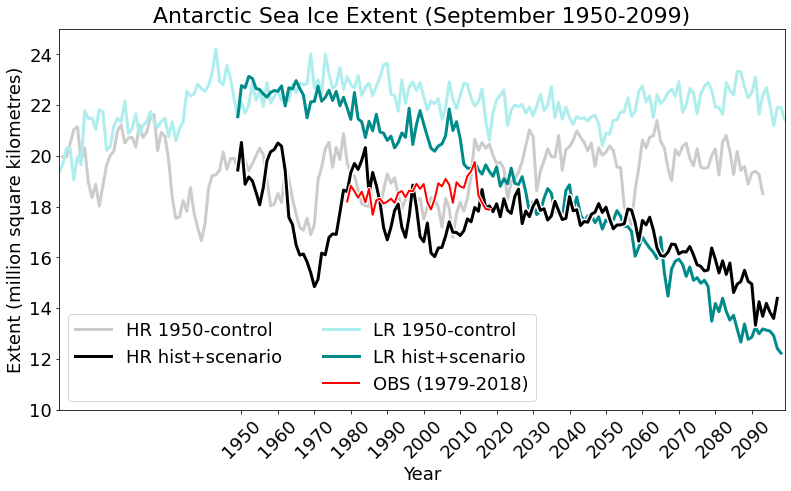

In [4]:
#-- plot everything together
fig=plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)

#---- HR ---------------------------------
plt.plot(data_Figure3a['HR']['spinup-time'], data_Figure3a['HR']['spinup-data'], color='0.8',linewidth=3.) # label='HR spinup', '0.6'

# plot HR control
#
HR_contro_time=data_Figure3a['HR']['control-time']
HR_contro_data=data_Figure3a['HR']['control-data']
plt.plot(HR_contro_time, HR_contro_data, color='0.8',linewidth=3.,label='HR 1950-control') # original data

# plot HR scenario 
#
plt.plot(data_Figure3a['HR']['scenario-time'], data_Figure3a['HR']['scenario-data'], color='white',linewidth=6.,zorder=39) # original data
plt.plot(data_Figure3a['HR']['scenario-time'], data_Figure3a['HR']['scenario-data'], color='black',linewidth=3.,label='HR hist+scenario',zorder=40) # original data

plt.plot(np.zeros(1), np.zeros([1,1]), color='w', alpha=0, label=' '.ljust(28)) # dummy entry

#----- LR ---------------------------------
plt.plot(data_Figure3a['LR']['spinup-time'], data_Figure3a['LR']['spinup-data'], color='paleturquoise',linewidth=3.) # label='LR spinup', 'darkturquoise'

# plot LR control
plt.plot(data_Figure3a['LR']['control-time'], data_Figure3a['LR']['control-data'], color='paleturquoise',linewidth=3.,label='LR 1950-control') # original data
# plot LR scenario
plt.plot(data_Figure3a['LR']['scenario-time'], data_Figure3a['LR']['scenario-data'], color='darkcyan',linewidth=3.,label='LR hist+scenario')

#---- NSIDC ('50' is 1950, '79' is 1979) --
plt.plot(data_Figure3a['OBS']['time'], data_Figure3a['OBS']['data'], color='white', linewidth=4.,zorder=59)
plt.plot(data_Figure3a['OBS']['time'], data_Figure3a['OBS']['data'], color='red', linewidth=2., label='OBS (1979-2018)', zorder=60)


plt.ylabel('Extent (million square kilometres)',fontsize=18)
plt.xlabel('Year',fontsize=18)

plt.xticks(np.arange(50,200,10),np.arange(1950,2098,10),fontsize=18,rotation=45)
plt.axis([0.0,199,10.,25.]) # [xmin, xmax, ymin, ymax]
plt.yticks([10.0,12.0,14.0,16.0,18.0,20.,22.,24.], fontsize = 18)

plt.title('Antarctic Sea Ice Extent (September 1950-2099)',fontsize=22)
plt.legend(loc='lower left', ncol=2, fontsize=18)
plt.show()

In [5]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure3a.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()